In [4]:
%matplotlib inline
if __package__ is None:
    import sys, os
    sys.path.append(os.path.realpath("/data/shared/Software/"))
from CMS_Deep_Learning.utils.archiving import get_trials_by_name, get_all_data, DataProcedure, KerasTrial
from CMS_Deep_Learning.layers.slice import Slice
from CMS_Deep_Learning.layers.lorentz import Lorentz
from CMS_Deep_Learning.utils.analysistools import *
from CMS_Deep_Learning.utils.plot import *
from CMS_Deep_Learning.utils.metrics import accVsEventChar, getTrialError
from keras.utils.visualize_util import plot
from IPython.display import Image, display
import numpy as np
archive_dir = "/data/shared/Delphes/keras_archive/"

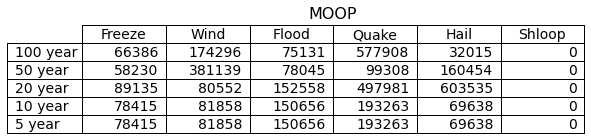

In [5]:
#def make
#colors = [(0,0,1.0),(.25,.75,.25), (1,0,0), (1,.65,0), (1,1,0)]
data = [[  66386,  174296,   75131,  577908,   32015, 0],
            [  58230,  381139,   78045,   99308,  160454, 0],
            [  89135,   80552,  152558,  497981,  603535, 0],
            [  78415,   81858,  150656,  193263,   69638, 0],
           [  78415,   81858,  150656,  193263,   69638, 0]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail', 'Shloop')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]
plotTable(rows,columns, data,title="MOOP")

In [6]:
def sortOnMetric(trials,sortMetric='test_acc'):
    def getKey(trial):
        return trial.get_from_record(sortMetric)
    trials.sort(key=getKey, reverse=True)
    return trials

trials = get_trials_by_name(".", archive_dir)
for trial in trials:
    trial.summary()
#print(trials)
#trials = sortOnMetric(trials)

--------------------------------------------------
TRIAL SUMMARY (2f4c193776cab51ed1a67358440a2f34eda04532)
    Record_Info:
        name = [u'trial', u'lorentz'], elapse_time = 0:37:20, fit_cycles = 1
        test_acc = 0.5556, val_acc = 0.7270, test_loss = 7.1246
        num_train = 300000, num_validation = 60000, num_test = 60000
        activation = relu, depth = 1, dropout = 0.0, lables = [u'ttbar', u'wjet', u'qcd'], lstm_dropout = 0.0, max_EFlow_size = 100, sort_on = PT_ET
--------------------------------------------------
--------------------------------------------------
TRIAL SUMMARY (516d1cb7a9bb67e9b60a28206fa3cbf60ed8dad5)
    Record_Info:
        name = [u'trial', u'LSTM'], elapse_time = 5:06:43, fit_cycles = 1
        test_acc = 0.8074, val_acc = 0.8217, test_loss = 0.8132
        num_train = 225000, num_validation = 60000, num_test = 60000
        activation = tanh, depth = 1, dropout = 0.0, labels = [u'ttbar', u'wjet', u'qcd'], lstm_dropout = 0.0, patience = 10, query =

In [7]:
trials = get_trials_by_name("LSTM", archive_dir)
trials = findWithMetrics(trials, {"useObjTypeColumn" : True})

#trial = KerasTrial.find_by_hashcode(archive_dir, "48acbcf67d395c1ad08261c259a166e2dcde2460")
trial = trials[0]
trial.summary()

#trial.hashcode = "48acbcf67d395c1ad08261c259a166e2dcde2460"

print(type(trial.val_procedure))

--------------------------------------------------
TRIAL SUMMARY (40ba6f6c372697218128b9493834451ae739bf3c)
    Record_Info:
        name = [u'trial', u'LSTM'], elapse_time = 4:13:20, fit_cycles = 1
        test_acc = 0.8992, val_acc = 0.8992, test_loss = 0.2320
        num_train = 225000, num_validation = 60000, num_test = 60000
        activation = tanh, depth = 1, dropout = 0.0, labels = [u'ttbar', u'wjet', u'qcd'], lstm_dropout = 0.0, patience = 8, query = PT_ET > 1.0, sort_on = Eta, useObjTypeColumn = True, val_acc_error = 0.000979855942508
--------------------------------------------------
<type 'list'>


In [8]:
model = trial.compile(loadweights=True,custom_objects={"Lorentz": Lorentz, "Slice" : Slice})

p = DataProcedure.from_json(archive_dir,trial.val_procedure[0])
#print(p)
#print(trial.nb_val_samples)
gen = p.getData()
#predictions = model.predict_generator(, trial.nb_val_samples)

In [9]:
trial.summary()

--------------------------------------------------
TRIAL SUMMARY (40ba6f6c372697218128b9493834451ae739bf3c)
    Record_Info:
        name = [u'trial', u'LSTM'], elapse_time = 4:13:20, fit_cycles = 1
        test_acc = 0.8992, val_acc = 0.8992, test_loss = 0.2320
        num_train = 225000, num_validation = 60000, num_test = 60000
        activation = tanh, depth = 1, dropout = 0.0, labels = [u'ttbar', u'wjet', u'qcd'], lstm_dropout = 0.0, patience = 8, query = PT_ET > 1.0, sort_on = Eta, useObjTypeColumn = True, val_acc_error = 0.000979855942508
--------------------------------------------------


In [17]:
#trial1 = KerasTrial.find_by_hashcode(archive_dir, "48acbcf67d395c1ad08261c259a166e2dcde2460")
#trial2 = KerasTrial.find_by_hashcode(archive_dir, "195b7fab0e8199a3185d093756bcd35b2bc63081")

def getTrialBins(trial):
    trial.summary()
    d = accVsEventChar(trial, None, np.sum, "PT_ET", ["EFlowPhoton","EFlowNeutralHadron","EFlowTrack"],
                       custom_objects={"Slice": Slice, "Lorentz": Lorentz},equalBins=False)
    #plotBins(d,title='Accuracy vs Sum of PF Candidate PT', xlabel="PT GeV", ylabel='Accuracy', color=(0.553,0.188,0.38))
    return d
bins = [getTrialBins(t) for t in trials[:4]] 
#plotTrial(trial2)

--------------------------------------------------
TRIAL SUMMARY (40ba6f6c372697218128b9493834451ae739bf3c)
    Record_Info:
        name = [u'trial', u'LSTM'], elapse_time = 4:13:20, fit_cycles = 1
        test_acc = 0.8992, val_acc = 0.8992, test_loss = 0.2320
        num_train = 225000, num_validation = 60000, num_test = 60000
        activation = tanh, depth = 1, dropout = 0.0, labels = [u'ttbar', u'wjet', u'qcd'], lstm_dropout = 0.0, patience = 8, query = PT_ET > 1.0, sort_on = Eta, useObjTypeColumn = True, val_acc_error = 0.000979855942508
--------------------------------------------------
--------------------------------------------------
TRIAL SUMMARY (8eca5af4c8de1197cf0f4f11fac47c9c09f7e4e9)
    Record_Info:
        name = [u'trial', u'LSTM'], elapse_time = 3:56:41, fit_cycles = 1
        test_acc = 0.9736, val_acc = 0.9755, test_loss = 0.0764
        num_train = 150000, num_validation = 40000, num_test = 40000
        activation = tanh, depth = 1, dropout = 0.0, labels = [u'

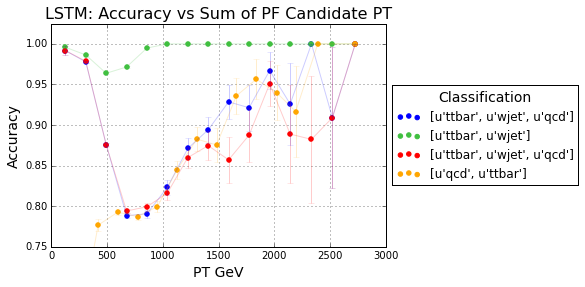

In [21]:
colors = [(0,0,1.0),(.25,.75,.25), (1,0,0), (1,.65,0)]
lables = [trial.get_from_record("labels") for trial in trials[:4]]
plotBins(bins,mode="scatter",title='LSTM: Accuracy vs Sum of PF Candidate PT',binLabels=lables, xlabel="PT GeV", ylabel='Accuracy',
         legendTitle="Classification",colors=colors, alpha=.2, ylim=(0.75, 1.025), xlim=(0,3000))

In [ ]:
[ 0.009051    0.00619716]
[ 0.00876452  0.0061347 ]

In [ ]:
bins = [getTrialBins(t) for t in trials[:4]]

In [16]:
trials[1].summary()
getTrialError(trials[1],custom_objects={"Slice":Slice, "Lorentz" : Lorentz})

--------------------------------------------------
TRIAL SUMMARY (8eca5af4c8de1197cf0f4f11fac47c9c09f7e4e9)
    Record_Info:
        name = [u'trial', u'LSTM'], elapse_time = 3:56:41, fit_cycles = 1
        test_acc = 0.9736, val_acc = 0.9755, test_loss = 0.0764
        num_train = 150000, num_validation = 40000, num_test = 40000
        activation = tanh, depth = 1, dropout = 0.0, labels = [u'ttbar', u'wjet'], lstm_dropout = 0.0, patience = 8, query = PT_ET > 1.0, sort_on = Phi, useObjTypeColumn = True
--------------------------------------------------


/data/shared/Software/CMS_Deep_Learning/utils/metrics.py:177: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  batch_metrics = [None] * num_batches


0.0007855904450574537

In [ ]:
('SEM:', array([ 0.00162949,  0.00098312]))